In [ ]:
#Dataset from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import linear_model, model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

##Reading Datasets

In [20]:
fake = pd.read_csv("/Fake.csv")
real = pd.read_csv("/Real.csv")

In [21]:
fake.shape

(23481, 4)

In [22]:
real.shape

(21417, 4)

##Preparing and cleaning the data

In [23]:
#Flag to distinguish between real and fake
fake['target'] = 'fake'
real['target'] = 'real'

In [24]:
# Concatenating the dataframes
data = pd.concat([fake, real]).reset_index(drop=True)
data.shape

# Shuffling the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

data.head()

,title,text,subject,date,target
0,At least 4 dead after powerful Mexico quake: o...,MEXICO CITY (Reuters) - At least four people w...,worldnews,"September 19, 2017",real
1,FORMER FBI ASSISTANT DIRECTOR on Anti-Trump FB...,WE COULDN T AGREE MORE! Former FBI Assistant D...,politics,"Dec 16, 2017",fake
2,MEDIA ATTACKS TAYLOR SWIFT Over Refusal To Cri...,Tom Barnes mocks Taylor Swift in his latest ar...,politics,"Jan 14, 2017",fake
3,British PM May's voice repeatedly fails in key...,"MANCHESTER, England (Reuters) - British Prime ...",worldnews,"October 4, 2017",real
4,CNN HAMMERS Kellyanne Conway For Lying About ...,Kellyanne Conway just got hammered with facts ...,News,"February 6, 2017",fake


In [25]:
#Removing the date from the data
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,At least 4 dead after powerful Mexico quake: o...,MEXICO CITY (Reuters) - At least four people w...,worldnews,real
1,FORMER FBI ASSISTANT DIRECTOR on Anti-Trump FB...,WE COULDN T AGREE MORE! Former FBI Assistant D...,politics,fake
2,MEDIA ATTACKS TAYLOR SWIFT Over Refusal To Cri...,Tom Barnes mocks Taylor Swift in his latest ar...,politics,fake
3,British PM May's voice repeatedly fails in key...,"MANCHESTER, England (Reuters) - British Prime ...",worldnews,real
4,CNN HAMMERS Kellyanne Conway For Lying About ...,Kellyanne Conway just got hammered with facts ...,News,fake


In [26]:
#Removing the titles
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,MEXICO CITY (Reuters) - At least four people w...,worldnews,real
1,WE COULDN T AGREE MORE! Former FBI Assistant D...,politics,fake
2,Tom Barnes mocks Taylor Swift in his latest ar...,politics,fake
3,"MANCHESTER, England (Reuters) - British Prime ...",worldnews,real
4,Kellyanne Conway just got hammered with facts ...,News,fake


In [27]:
#Converting to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,mexico city (reuters) - at least four people w...,worldnews,real
1,we couldn t agree more! former fbi assistant d...,politics,fake
2,tom barnes mocks taylor swift in his latest ar...,politics,fake
3,"manchester, england (reuters) - british prime ...",worldnews,real
4,kellyanne conway just got hammered with facts ...,News,fake


In [28]:
#Removing punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data.head()

,text,subject,target
0,mexico city reuters at least four people were...,worldnews,real
1,we couldn t agree more former fbi assistant di...,politics,fake
2,tom barnes mocks taylor swift in his latest ar...,politics,fake
3,manchester england reuters british prime mini...,worldnews,real
4,kellyanne conway just got hammered with facts ...,News,fake


In [29]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,subject,target
0,mexico city reuters least four people killed p...,worldnews,real
1,agree former fbi assistant director james kall...,politics,fake
2,tom barnes mocks taylor swift latest article w...,politics,fake
3,manchester england reuters british prime minis...,worldnews,real
4,kellyanne conway got hammered facts cnn lied n...,News,fake


##Exploring the data

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


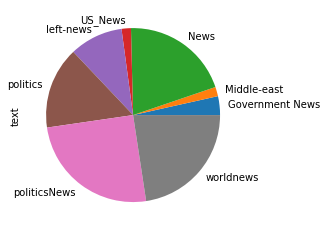

In [30]:
#Number of articles per subject
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="pie")
plt.show()

target
fake    23481
real    21417
Name: text, dtype: int64


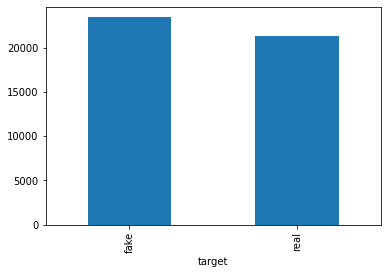

In [31]:
#Number of fake and real articles
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [34]:
#Counting the most frequently occuring words   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'red')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

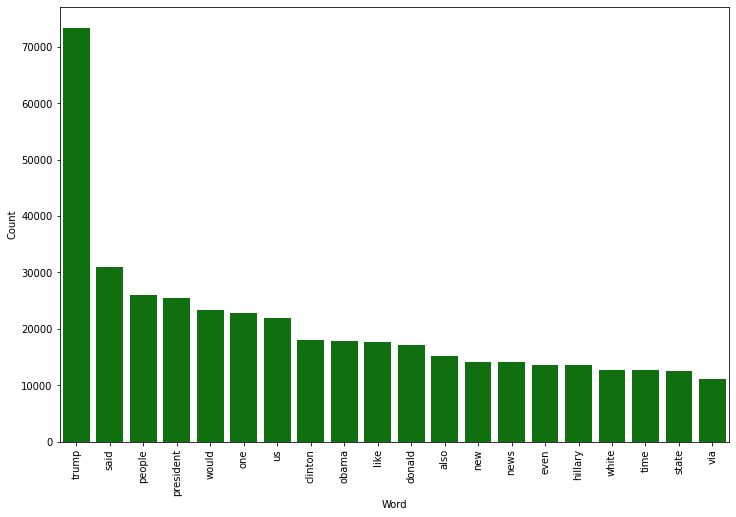

In [33]:
# Most frequently occuring words in FAKE news
counter(data[data["target"] == "fake"], "text", 20)

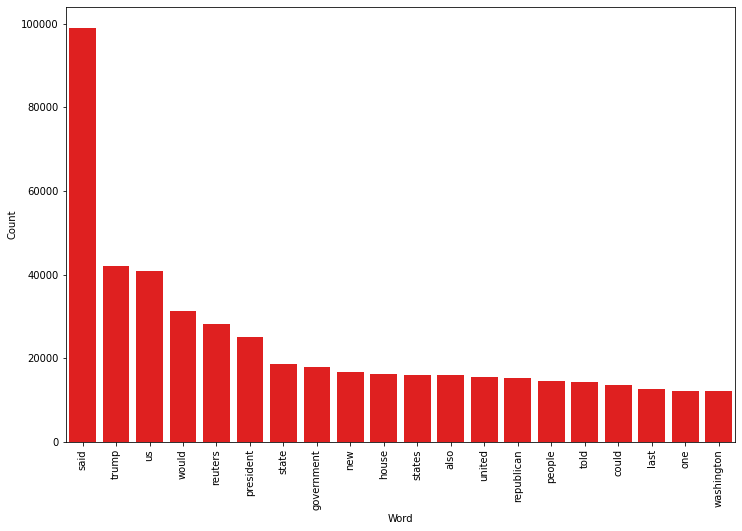

In [35]:
# Most frequently occurring words in REAL news
counter(data[data["target"] == "real"], "text", 20)

In [36]:
#Vectorizing and applying TF-IDF
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.8, random_state=45)
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

#Fitting the model
model = pipe.fit(X_train, y_train)

#Accuracy
prediction = model.predict(X_test)
print("Model Accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Model Accuracy: 97.64%
